# Time Series Data Analysis Project

In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
# read the data
df = pd.read_csv('10_AirPassengers.csv')
df

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


# Data Pre-processing

In [8]:
# changes the names of columns
df.columns = ["Date", "Number of Passengers"]
df.head()

,Date,Number of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


d:\Data_Science_And_AI\Miniconda\envs\tf_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Data_Science_And_AI\Miniconda\envs\tf_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Date', ylabel='Number of Passengers'>

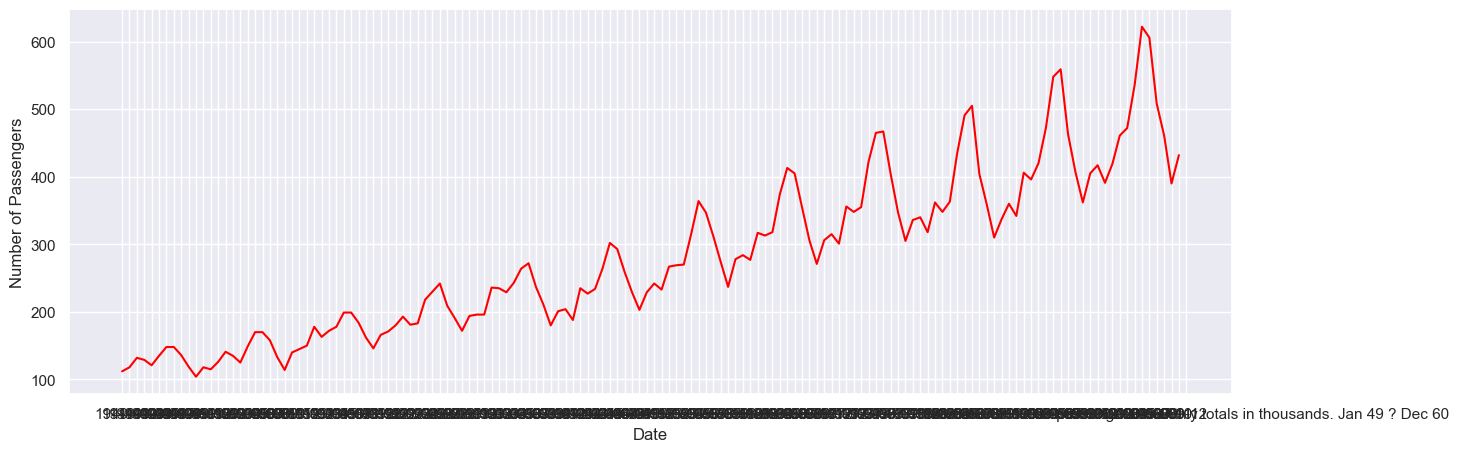

In [9]:
sns.lineplot(x="Date", y="Number of Passengers",color="red", data=df)

d:\Data_Science_And_AI\Miniconda\envs\tf_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Data_Science_And_AI\Miniconda\envs\tf_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



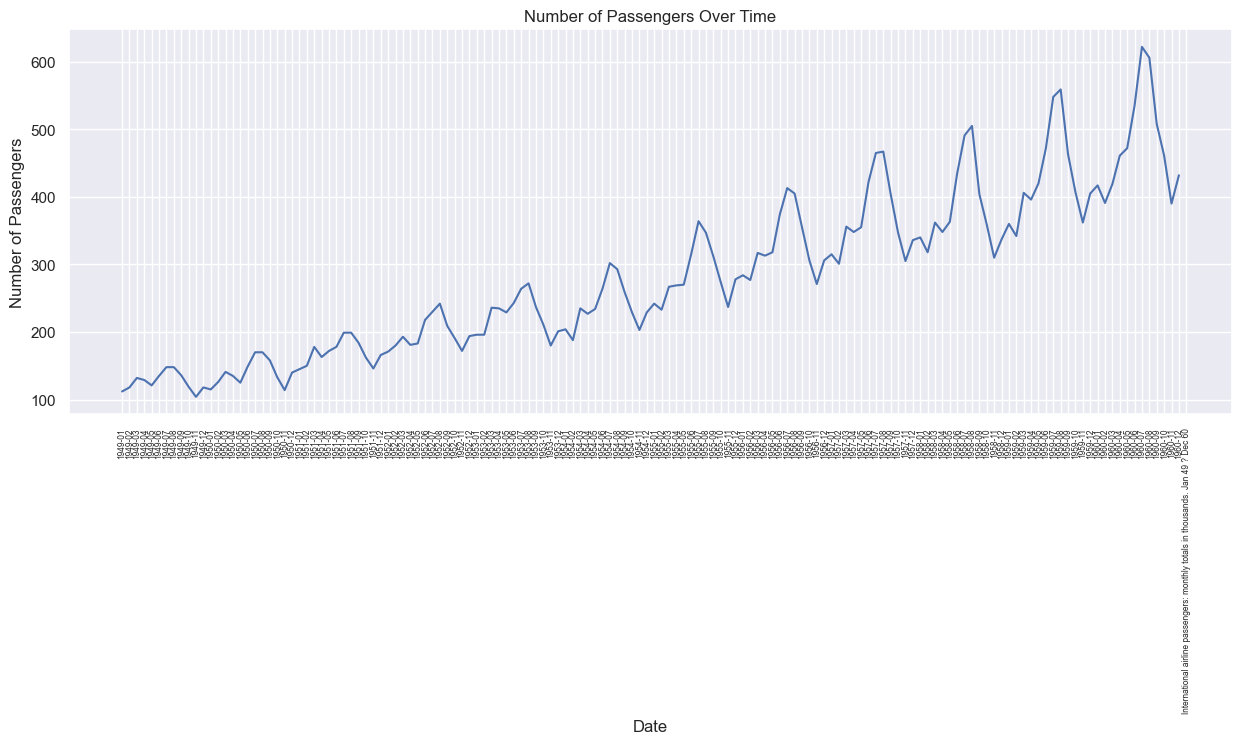

In [11]:
# Replace inf with NaN in your dataframe
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# plot the data using sns
sns.set(rc={'figure.figsize':(15, 5)}) # set the figure size
sns.lineplot(x = "Date", y = "Number of Passengers",  data = df)

# set the labels
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Over Time")

# rotate x-axis ticks
plt.xticks(rotation=90, fontsize=6)

# make same plot using plotly
import plotly.express as px
fig = px.line(df, x="Date", y="Number of Passengers", title='Number of Passengers Over Time')

# change color of line
fig.update_traces(line_color='red')
fig.show()

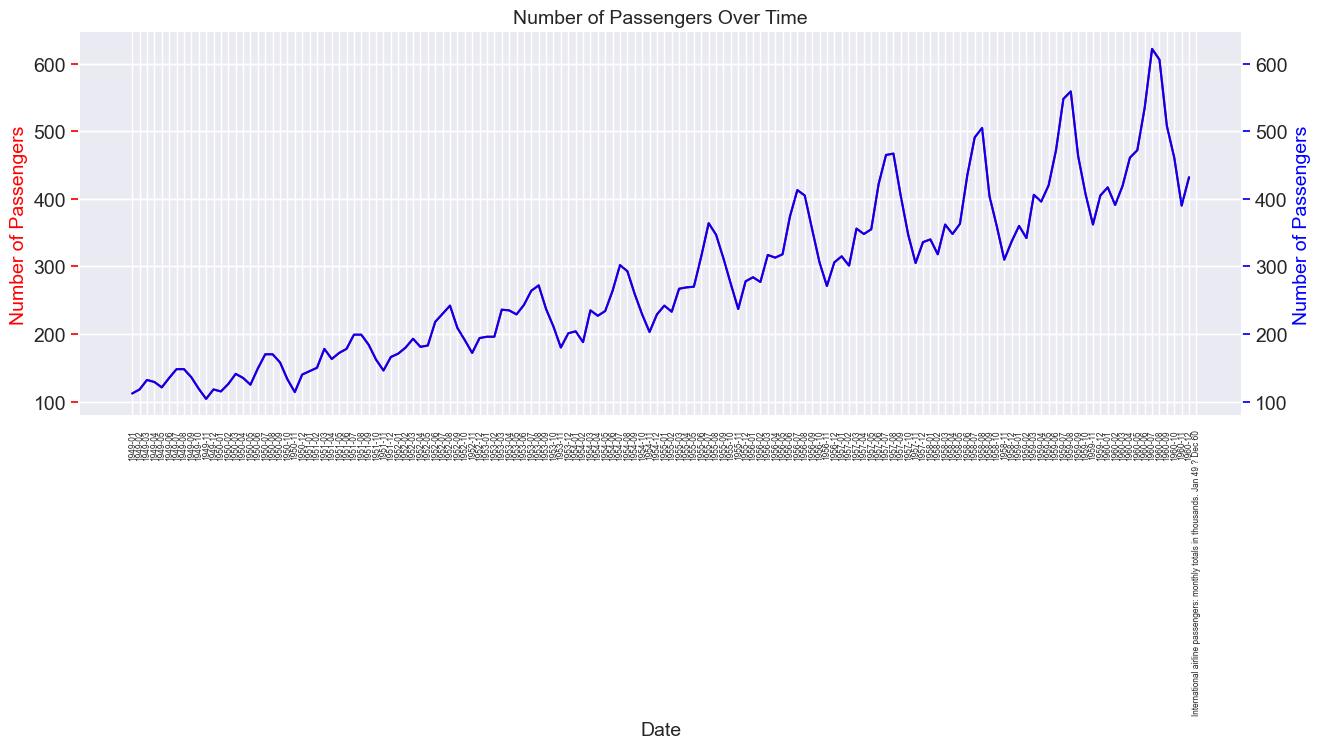

In [12]:
# make two sided plot using matplotlib
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df["Date"], df["Number of Passengers"], color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Number of Passengers",color="red",fontsize=14)
ax.set_title("Number of Passengers Over Time",fontsize=14)
ax.tick_params(axis="y",color="red",labelsize=14)
ax.tick_params(axis="x",labelsize=6, rotation=90)
ax2=ax.twinx()
ax2.plot(df["Date"], df["Number of Passengers"],color="blue")
ax2.set_ylabel("Number of Passengers",color="blue",fontsize=14)
ax2.tick_params(axis="y",color="blue",labelsize=14)
plt.show()



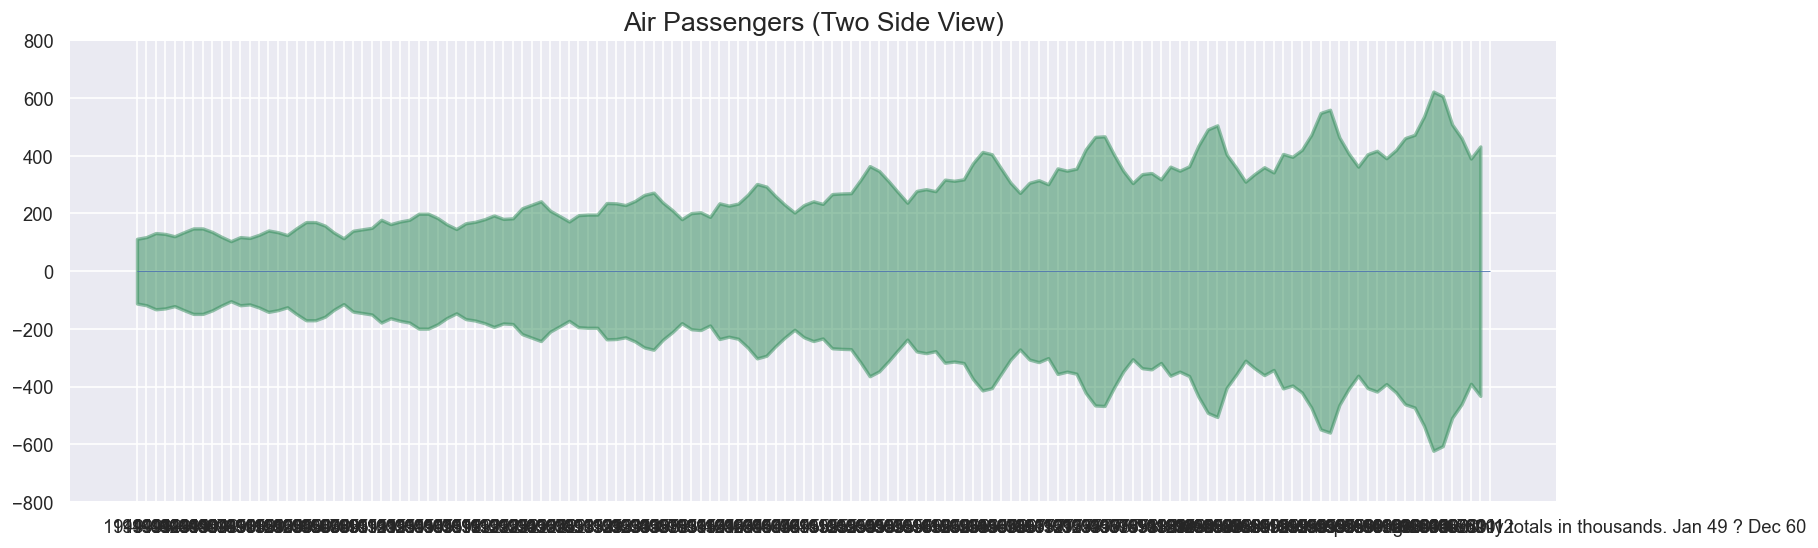

In [13]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

In [14]:
# decompose the data
result = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=12)
result.plot()
# plot in plotly
fig = px.line(result.observed, x=result.observed.index, y=result.observed.values, title='Observed')
fig.show()

ValueError: This function does not handle missing values

<Axes: >

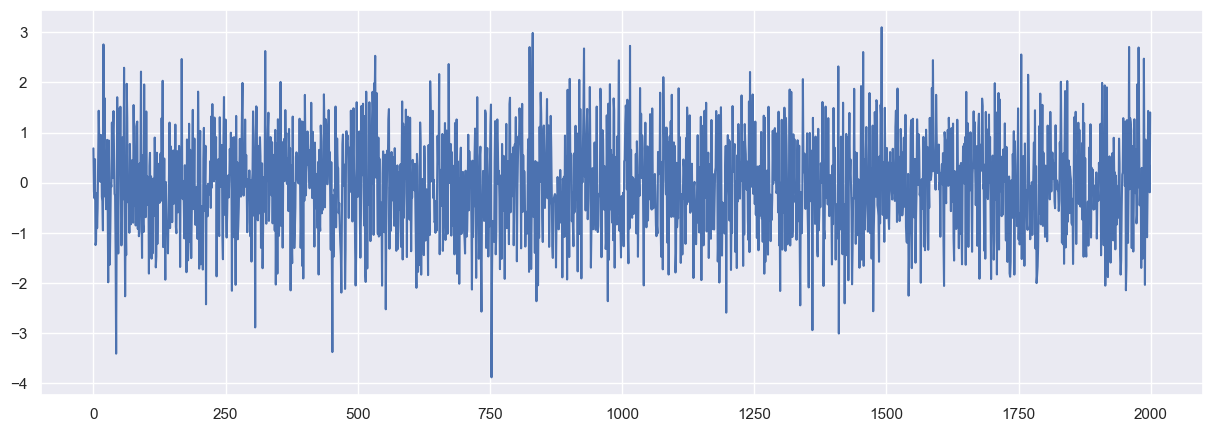

In [33]:
rand_numbs = np.random.randn(2000)
rand_numbs
pd.Series(rand_numbs).plot()
